<a href="https://colab.research.google.com/github/manyasahay/Machine-Learning/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Importing dataset

In [2]:
df = pd.read_csv('/content/train (1).csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [6]:
df['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [8]:
df['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [9]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [10]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [11]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


Data preprocessing

In [12]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
df['Property_Area'] = df['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
df['Dependents'] = df['Dependents'].map({'3+':3,'0':0,'2':2,'1':1})

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [16]:

loan_amount_mean = df['LoanAmount'].mean()
loan_amount_term_mean = df['Loan_Amount_Term'].mean()
gender_mode = df['Gender'].mode()[0]
married_mode = df['Married'].mode()[0]
dependents_mode = df['Dependents'].mode()[0]
self_employed_mode = df['Self_Employed'].mode()[0]
credit_history_mode = df['Credit_History'].mode()[0]

fill_values = {
    'LoanAmount': loan_amount_mean,
    'Loan_Amount_Term': loan_amount_term_mean,
    'Gender': gender_mode,
    'Married': married_mode,
    'Dependents': dependents_mode,
    'Self_Employed': self_employed_mode,
    'Credit_History': credit_history_mode
}

# Fill the missing values
df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].fillna(fill_values)


In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [19]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Defining X and y

In [27]:
X = df.iloc[:,1:12]

In [28]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2


In [29]:
y = df['Loan_Status']

In [30]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,0
8,1
9,0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.28,random_state=42)


In [32]:
X_train.shape

(442, 11)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Random Forest Model

In [35]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

In [36]:
y_predicted_train = rf.predict(X_train)
print(classification_report(y_train,y_predicted_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       310

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



Evaluation on testing set

In [37]:
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.43      0.79      0.56        33
           1       0.94      0.76      0.84       139

    accuracy                           0.76       172
   macro avg       0.69      0.77      0.70       172
weighted avg       0.84      0.76      0.78       172



In [38]:
rf.feature_importances_

array([0.02483666, 0.02815244, 0.05269709, 0.02563041, 0.01963666,
       0.21339309, 0.12107931, 0.18892016, 0.05321814, 0.21860496,
       0.05383106])

Credit_History column has highest feature importance

Visualization

In [43]:
importances = rf.feature_importances_
feature_names= X.columns
indices = np.argsort(importances)
sorted_feature_names = [feature_names[i] for i in indices]
print(sorted_feature_names)
print(indices)

['Self_Employed', 'Gender', 'Education', 'Married', 'Dependents', 'Loan_Amount_Term', 'Property_Area', 'CoapplicantIncome', 'LoanAmount', 'ApplicantIncome', 'Credit_History']
[ 4  0  3  1  2  8 10  6  7  5  9]


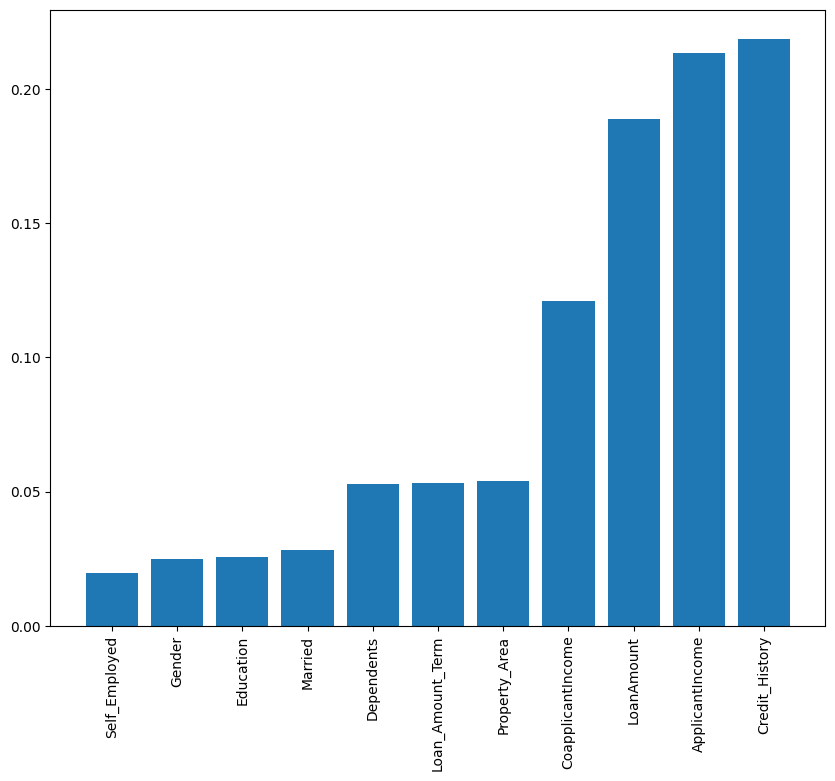

In [47]:
plt.figure(figsize=(10,8))
plt.bar(sorted_feature_names,importances[indices])
plt.xticks(rotation=90)
plt.show()